In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,5970
1.0,3


In [ ]:
# get percentages for the class  which is important for imbalanced data
data['Class'].value_counts(normalize=True)*100

,proportion
Class,
0.0,99.949774
1.0,0.050226


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

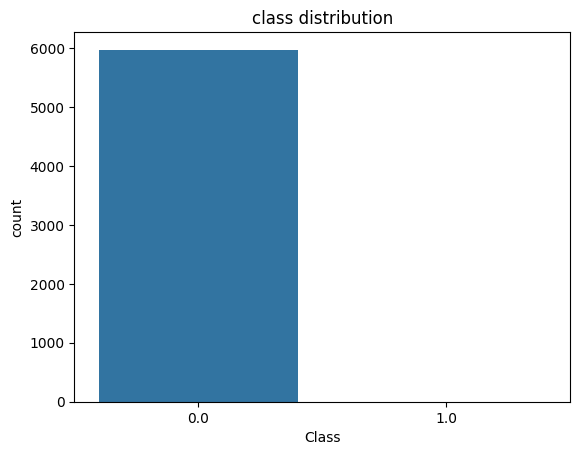

In [ ]:
sns.countplot(x="Class",data=data)
plt.title("class distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler() ##the obejct
data[["Time","Amount"]]=scalar.fit_transform(data[["Time","Amount"]])

In [ ]:
data['Hour']=(data['Time']//3600)%24
data["LogAmount"]=np.log1p(data['Amount'])

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,LogAmount
0,-1.517306,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.439322,0.0,23.0,0.364172
1,-1.517306,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.324053,0.0,23.0,-0.391640
2,-1.516740,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.629300,0.0,23.0,0.966718
3,-1.516740,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.303616,0.0,23.0,0.265142
4,-1.516173,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.025604,0.0,23.0,0.025282


In [ ]:

from sklearn.model_selection import train_test_split
x= data.drop(['Class'], axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

# Reduce k_neighbors to avoid needing 6+ samples
smote =SMOTE(k_neighbors=1, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [ ]:
from collections import Counter
print("before SMOTE:",Counter(y_train))
print("after SMOTE:",Counter(y_train_resampled))

before SMOTE: Counter({0.0: 4179, 1.0: 2})
after SMOTE: Counter({0.0: 4179, 1.0: 4179})


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
#initialize and train XGBOOST
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(x_train_resampled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:57:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
##predict on original test set
y_pred = xgb_model.predict(x_test)
y_proba = xgb_model.predict_proba(x_test)[:, 1]  # for ROC AUC


In [ ]:
print(y_pred)
print(y_proba)

[0 0 0 ... 0 0 0]
[0.00025262 0.00023871 0.00013526 ... 0.00088894 0.00064466 0.00013526]


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[1791    0]
 [   1    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792


ROC AUC Score:
0.9681742043551089


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(x_train_resampled, y_train_resampled)

# Predict on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:58:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792

ROC AUC Score: 0.9625907314349527


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


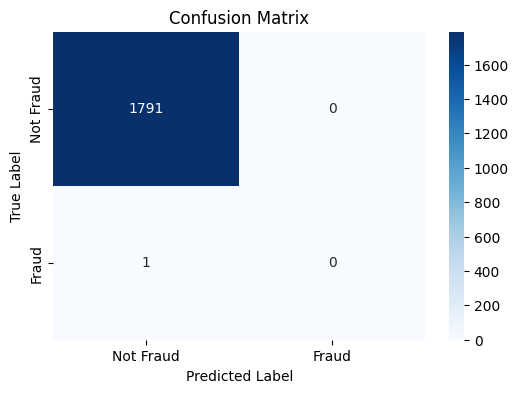

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = best_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train CatBoost model (without hyperparameter tuning)
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(x_train_resampled, y_train_resampled)

# Predict
y_pred = cat_model.predict(x_test)
y_proba = cat_model.predict_proba(x_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792

ROC AUC Score: 0.9570072585147963


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1. Define the model
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# 2. Define the parameter grid for tuning
param_dist = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# 3. Set up RandomizedSearchCV
cat_random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,                  # Number of random combinations
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4. Fit the model to resampled (SMOTE) training data
cat_random_search.fit(x_train_resampled, y_train_resampled)

# 5. Best model
best_cat_model = cat_random_search.best_estimator_

# 6. Evaluate on original test data
from sklearn.metrics import classification_report, roc_auc_score

y_pred_cat = best_cat_model.predict(x_test)
y_proba_cat = best_cat_model.predict_proba(x_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_cat))


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1792
   macro avg       0.50      0.50      0.50      1792
weighted avg       1.00      1.00      1.00      1792

ROC AUC Score: 0.9977666108319375


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


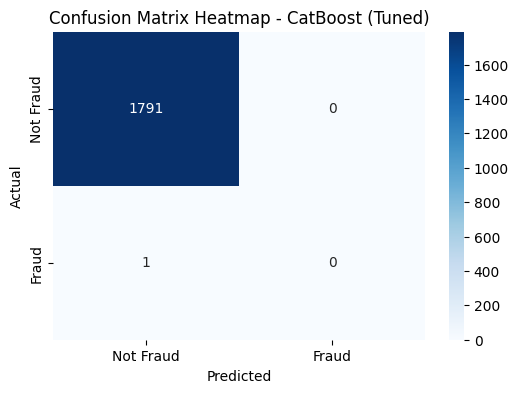

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get predictions again (if needed)
y_pred_cat = best_cat_model.predict(x_test)

# 2. Create confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)

# 3. Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - CatBoost (Tuned)')
plt.show()


In [ ]:
!pip install shap

In [ ]:
import shap

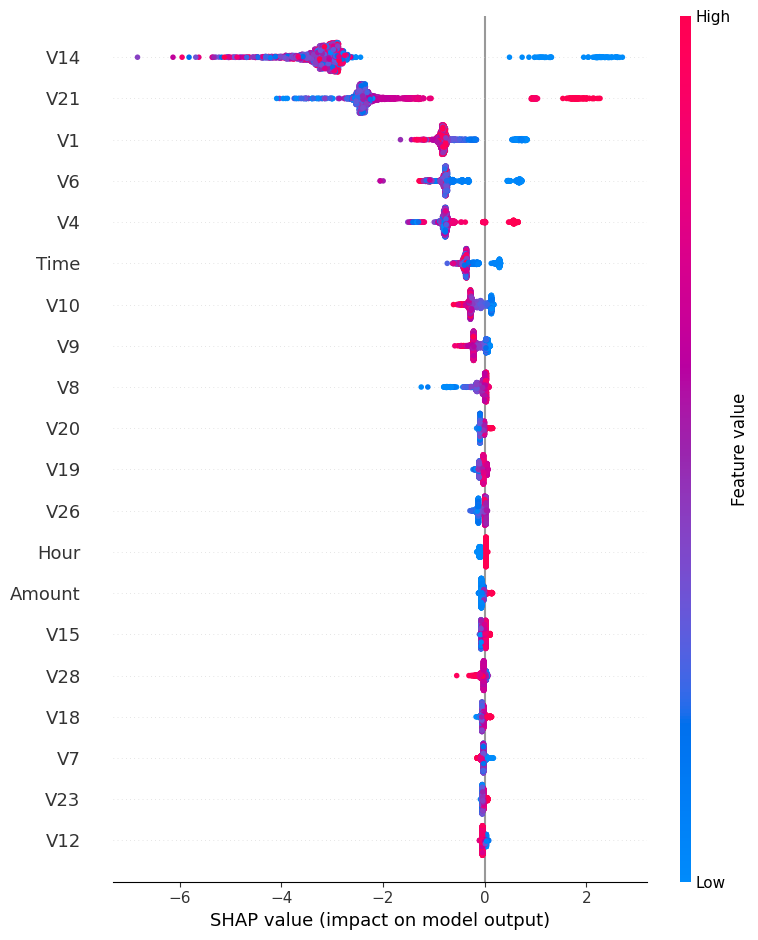

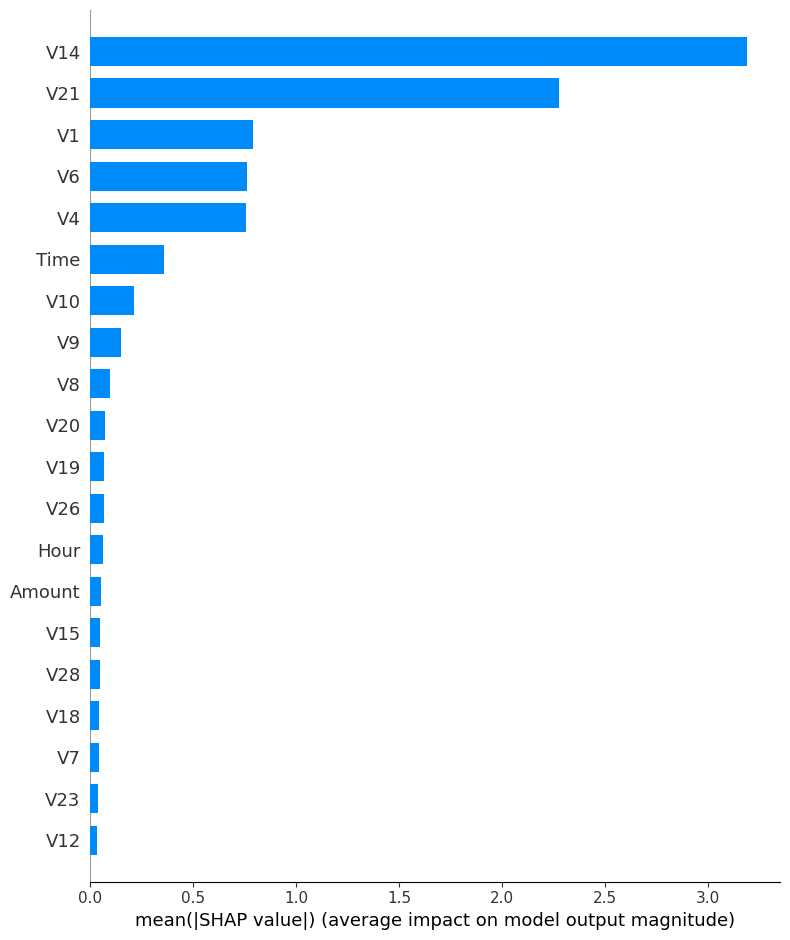

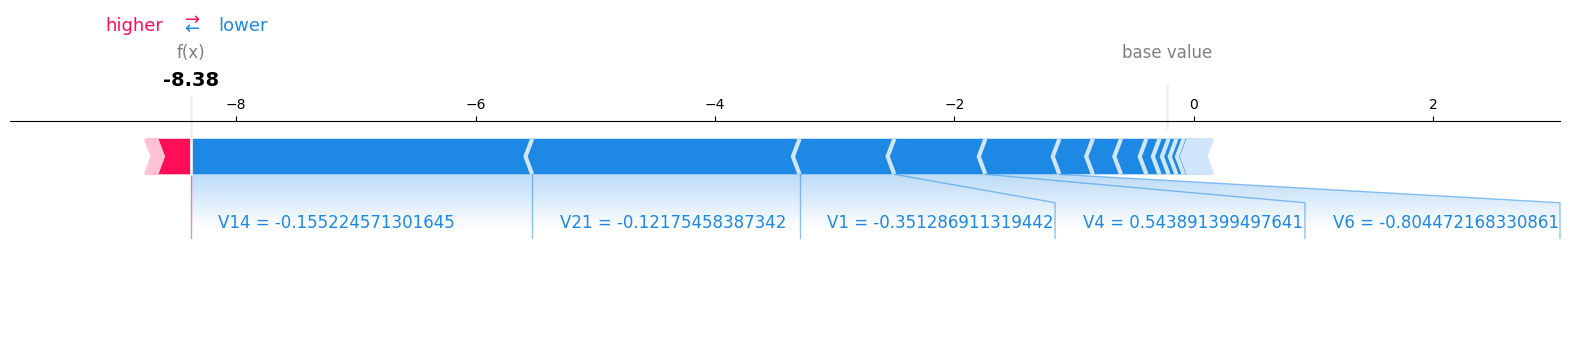

In [ ]:
shap.initjs()

# 4. Create SHAP TreeExplainer (CatBoost is tree-based)
explainer = shap.TreeExplainer(best_cat_model)

# 5. Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# 6. Summary Plot – Global Feature Importance
shap.summary_plot(shap_values, x_test)

# 7. Bar Plot – Sorted global feature importance
shap.summary_plot(shap_values, x_test, plot_type="bar")

# 8. Force Plot for a single prediction (index = 0, you can change it)
sample_index = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index],
    x_test.iloc[sample_index],
    matplotlib=True
)